### Run tests for warped p-variation

In [1]:
# !python tests.py

In [1]:
import sys
sys.path.insert(0, '../backend')
sys.path.insert(0, '../../data')

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import pybnb
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from generalized_dtw import Warp
from brute_force_warped_pvar import *
from branch_and_bound_warped_pvar import BnBWarping

from transformers import *

# First test with sin and cos

In [3]:
idx = np.linspace(0, 6.28, 5)
x = np.sin(idx)
y = np.cos(idx)

### DTW

In [4]:
dist = 'mink'

if dist == 'eucl':
    # Euclidean
    d = lambda a, b: (a-b)**2
    f_d = lambda DD, a, b: np.sqrt(DD**2 + d(a, b))
    final_operator = lambda x: np.sqrt(x)

elif dist == 'manh':
    # Manhattan
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: DD + d(a,b)
    final_operator = lambda x: x
    
else:
    # Minkowksi
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: max(DD, d(a,b))
    final_operator = lambda x: x

In [5]:
W = Warp(x,y,d,f_d,final_operator)

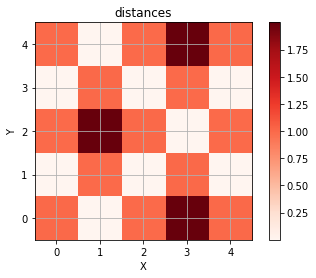

In [6]:
W.distance_cost_plot(W.pairwise_distances())

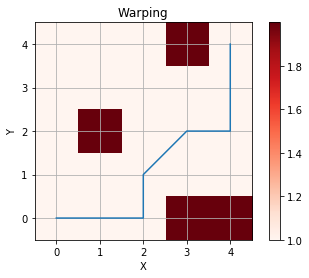

In [7]:
W.plot_lattice()

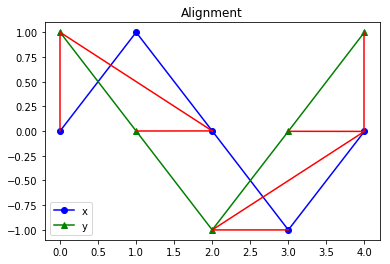

In [8]:
W.plot_alignment()

### Warped signature p-var via Branch-and-Bound

In [9]:
x = AddTime().fit_transform([x])[0]
y = AddTime().fit_transform([y])[0]

In [10]:
problem = BnBWarping(x, y, depth=2, norm='l1', p=1.5)

In [11]:
solver = pybnb.Solver(
#                       comm=None
                     )

In [12]:
results = solver.solve(problem,
#                        log=None,
                       relative_gap=1e-4,
#                        queue_strategy='breadth',
                       queue_strategy='depth'
                      )


Using non-default solver options:
 - queue_strategy: depth (default: bound)
 - relative_gap: 0.0001 (default: None)

Starting branch & bound solve:
 - dispatcher pid: 6396 (DESKTOP-0T8DJ4J)
 - worker processes: 1
-------------------------------------------------------------------------------------------------------------------------
         Nodes        |                     Objective Bounds                       |              Work              
      Expl    Unexpl  |      Incumbent           Bound   Rel. Gap         Abs. Gap | Time (s)  Nodes/Sec Imbalance   Idle
         0         1  |            inf            -inf        inf%             inf |      0.0       0.00     0.00%      0
         1         3  |            inf               0        inf%             inf |      0.0     167.12     0.00%      0
*        9         8  |       12.80045               0   100.0000%     12.80044927 |      0.0     432.32     0.00%      0
*       14         9  |       12.57948               0   10

In [23]:
results.objective

5.961213122651811

### Warped p-var via brute force

In [15]:
brute_force_warp = BruteForceWarpedPvar(x, y, p=1.5, depth=2, norm='l1', augment=False, add_time=False, parallelise=False)

number of warping paths to explore: 3432
time to find all possible paths: 4.62


Loop over all warps: 100%|██████████████████████████████████████████████████████| 48638/48638 [04:53<00:00, 165.64it/s]


total time for brute force with DP sequentially: 293.65 s


In [16]:
brute_force_warp.warped_pvar

5.683024696284301

In [42]:
brute_force_warp.best_warp

[(0, 0),
 (1, 0),
 (2, 0),
 (2, 1),
 (3, 2),
 (4, 3),
 (4, 4),
 (5, 4),
 (5, 5),
 (6, 6),
 (6, 6),
 (6, 6),
 (6, 6)]

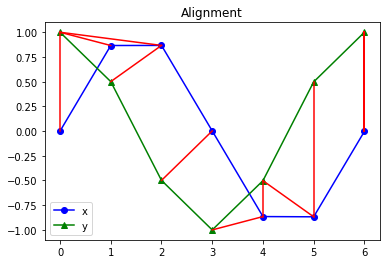

In [43]:
brute_force_warp.plot_alignment()

# Digits Similarity

In [4]:
import pickle

# load streams
with open('../../data/input.pickle', 'rb') as handle:
    inputs_MNIST = pickle.load(handle, encoding='latin1')

# load corresponding digit (optional)
with open('../../data/output.pickle', 'rb') as handle:
    outputs_MNIST = pickle.load(handle, encoding='latin1')

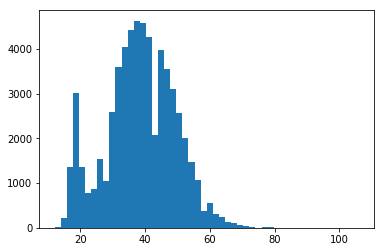

In [5]:
lengths = [len(d) for d in inputs_MNIST]
plt.hist(lengths, bins=50)
plt.show()

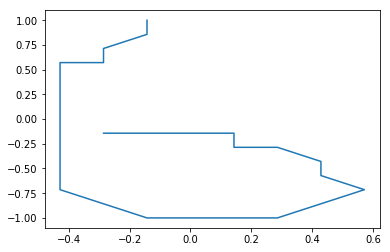

In [6]:
n = 9
digit = [d for d in inputs_MNIST if len(d)<30][n]

plt.plot(digit.T[0], digit.T[1])
plt.show()

In [7]:
epsilon = 8e-2
digit_perturbed = digit + np.random.normal(0, epsilon, digit.shape)

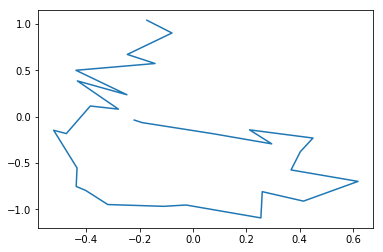

In [8]:
plt.plot(digit_perturbed.T[0], digit_perturbed.T[1])
plt.show()

In [9]:
dist = 'eucl'

if dist == 'eucl':
    # Euclidean
    d = lambda a, b: np.sum([(a-b)**2 for x in (a-b)])
    f_d = lambda DD, a, b: np.sqrt(DD**2 + d(a, b))
    final_operator = lambda x: np.sqrt(x)

elif dist == 'manh':
    # Manhattan
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: DD + d(a,b)
    final_operator = lambda x: x

else:
    # Minkowksi
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: max(DD, d(a,b))
    final_operator = lambda x: x

In [10]:
W = Warp(digit, digit_perturbed, d, f_d, final_operator, plot_2d=True)

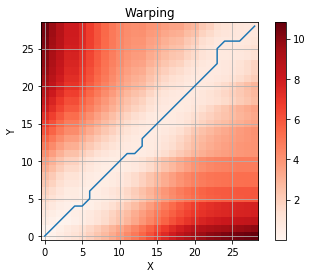

In [11]:
W.plot_lattice()

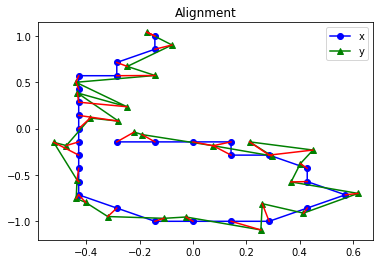

In [12]:
W.plot_alignment()

In [13]:
LP = BruteForceWarpedPvar(digit, digit_perturbed, p=1.5, depth=2, norm='l1', 
                          augment=False, add_time=False, parallelise=True)

number of warping paths to explore: 7648690600760440


KeyboardInterrupt: 

# Example with simple signature p-variation

In [3]:
path = np.array([0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0])
path = AddTime().fit_transform([path])[0]

In [4]:
p_variation_path(path=path, p=1.5, depth=3, norm='l1')

[0.0, 2.818075439858227, 17.263713402886435, 28.604935706376253, 40.456938330539515, 47.08997682159665, 54.790124072691924, 68.72218023285302, 80.2813087956054]


(18.609853858712462, [0, 2, 4, 5, 7, 8])

In [5]:
p_variation_path_optim(path=path, p=1.5, depth=3, norm='l1')

(18.609853858712462, [0, 2, 4, 5, 7, 8])

In [6]:
pow(80, 1/1.5)

18.566355334451114

# Example with signature p-variation distance

### We assume that $path_1$ and $path_2$ have already been aligned according to a warp

In [6]:
path1 = np.array([0.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, -1.0, 0.0, 6.43, 1.32, 23.1])
path2 = np.array([3.0, 1.0, 0.0, 2.0, 4.0, -1.0, 1.0, 3.0, -2.0, 4.21, 0.001, 10.])

path1 = AddTime().fit_transform([path1])[0]
path2 = AddTime().fit_transform([path2])[0]

In [7]:
d = p_variation_distance(path1, path2, p=1.5, depth=2, norm='l1')
d_optim = p_variation_distance_optim(path1, path2, p=1.5, depth=2, norm='l1')

print('distance with dynamic programming: {}'.format(d))
print('distance with optimisation algo: {}'.format(d_optim))

distance with dynamic programming: (296.9716167253778, [0, 2, 4, 5, 7, 11])
distance with optimisation algo: (296.9716167253778, [0, 2, 4, 5, 7, 11])


# Example with warped p-var package

In [8]:
path1 = np.array([0.0, 1.0, 2.0, 1.0, 4.0])
path2 = np.array([-3.0, 1.0, 0.0, 4.0, 2.0, 1.0])

path1 = AddTime().fit_transform([path1])[0]
path2 = AddTime().fit_transform([path2])[0]

### Compute the warped signature p-variation distance between $path_1$ and $path_2$

### 1) Sequential calculations

In [9]:
LP_seq = LatticePaths(path1, path2, p=1.5, depth=2, norm='l1', augment=False, add_time=False, brute_force=True, parallelise=False)

number of warping paths to explore: 126
time to find all possible paths: 0.05


Loop over all warps: 100%|██████████████████████████████████████████████████████████| 680/680 [00:02<00:00, 265.43it/s]


total time for brute force with DP sequentially: 2.57 s


### check output along one single warp

In [10]:
# example 1
warp = LP_seq.allPaths[3]

print(LP_seq.single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))
print(LP_seq.optim_single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))

(43.8798169977704, [0, 2, 6, 7, 9])
(43.74229167233559, [0, 2, 3, 6, 7, 9])


In [11]:
# example 2
warp = LP_seq.allPaths[7]

print(LP_seq.single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))
print(LP_seq.optim_single_warped_pvar(warp=warp, p=1.5, depth=2, norm='l1'))

(41.392522226814705, [0, 2, 6, 7, 9])
(41.250915020726076, [0, 2, 3, 6, 7, 8, 9])


### global answer

In [14]:
print('warping distance with dynamic programming: {} along {}'.format(LP_seq.warped_pvar, LP_seq.best_warp))
# print('warping distance with optimisation algo: {} along {}'.format(LP_seq.optim_warped_pvar, LP_seq.optim_best_warp))

warping distance with dynamic programming: 25.07518748871494 along [(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (3, 2), (4, 3), (4, 4), (4, 5), (4, 5)]


### 2) Computations in parallel

In [13]:
LP = LatticePaths(path1, path2, p=1.5, depth=2, norm='l1', augment=False, add_time=False, brute_force=True, parallelise=True)

number of warping paths to explore: 126
time to find all possible paths: 0.04
Using all available cores, i.e. 4
total time for brute force with DP in Parallel: 2.94 s


In [15]:
print('warping distance with dynamic programming: {}'.format(LP.warped_pvar))
# print('warping distance with optimisation algo: {}'.format(LP.optim_warped_pvar))

warping distance with dynamic programming: 25.07518748871494


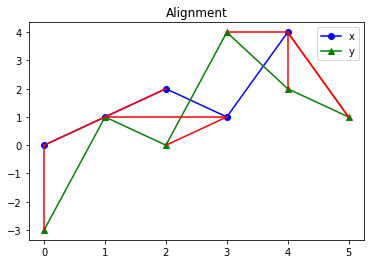

In [16]:
LP.plot_alignment()

# Generalized Dynamic Time Warping

### Example

In [2]:
idx = np.linspace(0, 6.28, 100)
x = np.sin(idx)
y = np.cos(idx)

In [3]:
dist = 'mink'

if dist == 'eucl':
    # Euclidean
    d = lambda a, b: (a-b)**2
    f_d = lambda DD, a, b: np.sqrt(DD**2 + d(a, b))

elif dist == 'manh':
    # Manhattan
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: DD + d(a,b)

else:
    # Minkowksi
    d = lambda a, b : np.abs(a-b)
    f_d = lambda DD, a, b: max(DD, d(a,b))

In [4]:
W = Warp(x,y,d,f_d)

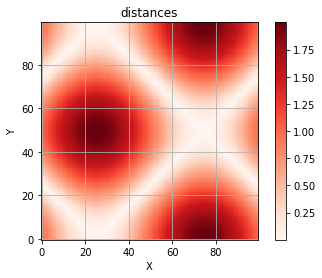

In [5]:
W.distance_cost_plot(W.pairwise_distances())

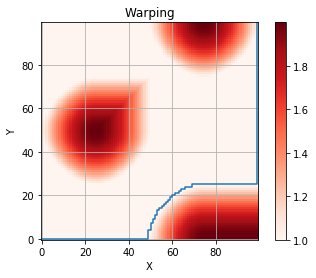

In [6]:
W.plot_lattice()

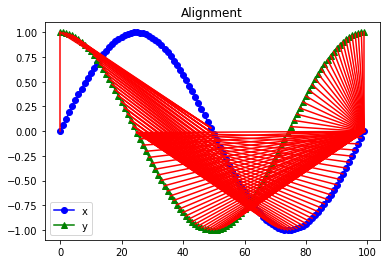

In [7]:
W.plot_alignment()